In [1]:
# Importing all applications and downloading them using: "pip install ..."

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



Just a note, sometimes the code will break so make sure to run like the previous lines such as reading the dataset and other things that may be included. Otherwise if you scroll far too down and run something, it might not work.

In [84]:
# Reads the Dataset
data = pd.read_csv('NFLX.csv')

# This removes duplicates
data_cleaned = data.drop_duplicates()

# Printing Sample
print(data_cleaned.sample(5))

# Data's shape, size, and attributes
print(data_cleaned.shape)
print(data_cleaned.columns)
print(data_cleaned.info())

           Date        Open        High         Low       Close   Adj Close  \
874  2021-07-27  518.080017  521.950012  512.049988  518.909973  518.909973   
688  2020-10-28  486.359985  494.000000  483.279999  486.239990  486.239990   
733  2021-01-04  539.000000  540.799988  515.090027  522.859985  522.859985   
308  2019-04-29  373.679993  374.579987  369.119995  371.829987  371.829987   
448  2019-11-14  283.250000  290.630005  283.220001  289.619995  289.619995   

      Volume  
874  2759000  
688  5992700  
733  4444400  
308  3821700  
448  6529000  
(1009, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   

# Problem Statement (Step 2)
Objective: Predicting Netflix's stock price.

Independent Variables: The date, opening price, high, low, adj close and volume.

Dependent Variable: The closing price


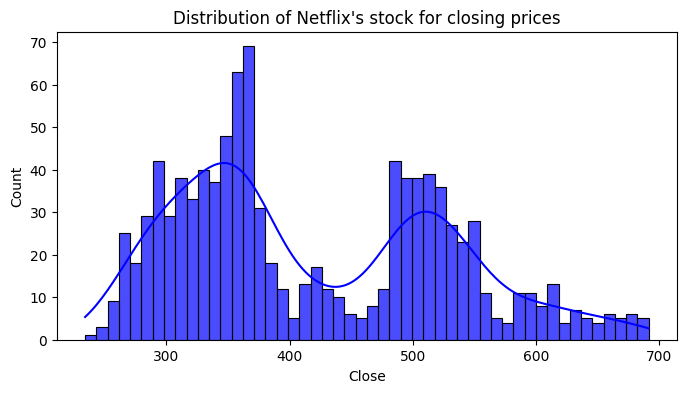

In [7]:
# Visualizing the distribution of the Close variable  (Step 3)

continiousvars = ['Close']
for var in continiousvars:
   plt.figure(figsize=(8, 4))
   sns.histplot(data_cleaned[var], color='blue',kde=True, bins=50, alpha=0.7)
   plt.title("Distribution of Netflix's stock for closing prices")
   plt.show()
# Tried to use palette=["#0000CC"]) but for some reason it wouldn't work, I also tried to get rgb values for color and that didn't work as well like doing color = ["0000CC"] or color = '0, 0, 204'

In [8]:
# Data exploration at basic level (Step 4)
print(data_cleaned.describe())  # This provides the statistics like the count, mean, std, min and percentiles.
print(data_cleaned.nunique())   # This is the catagory like date, open, high, low etc.

              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  
Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: in

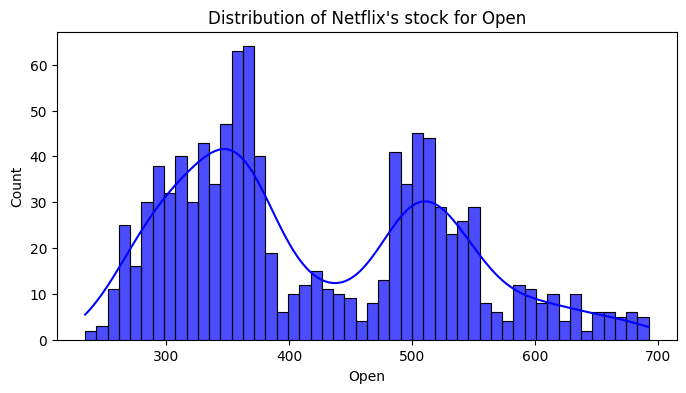

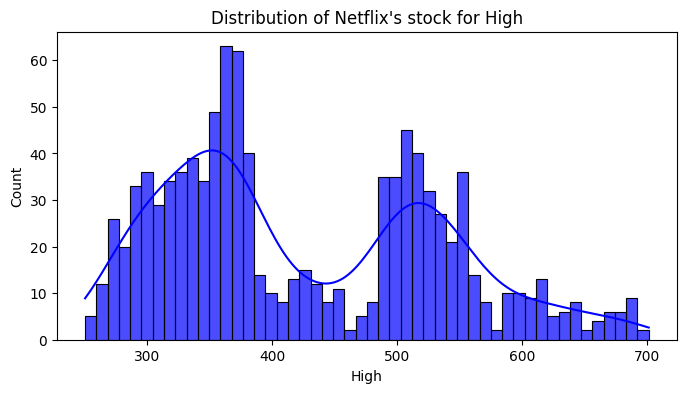

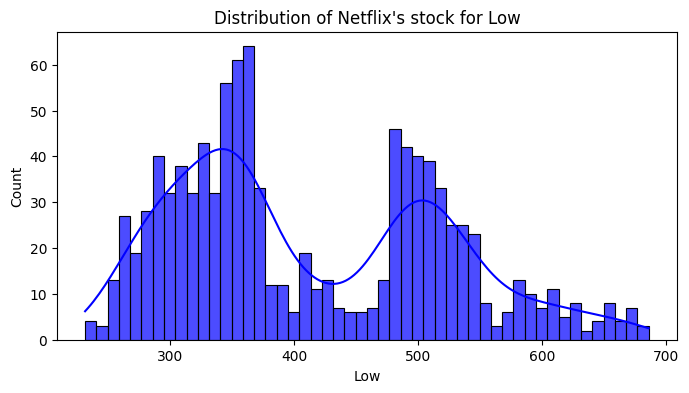

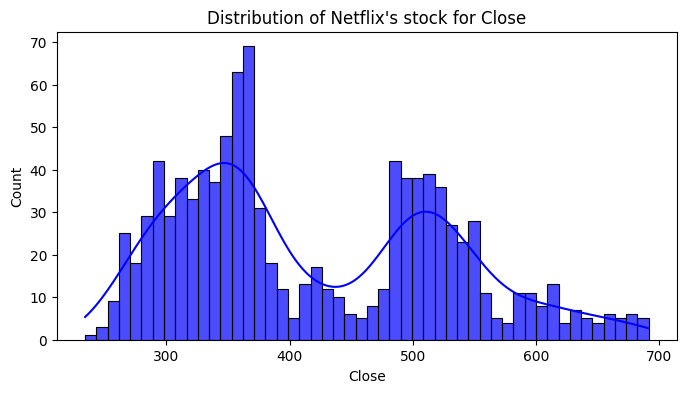

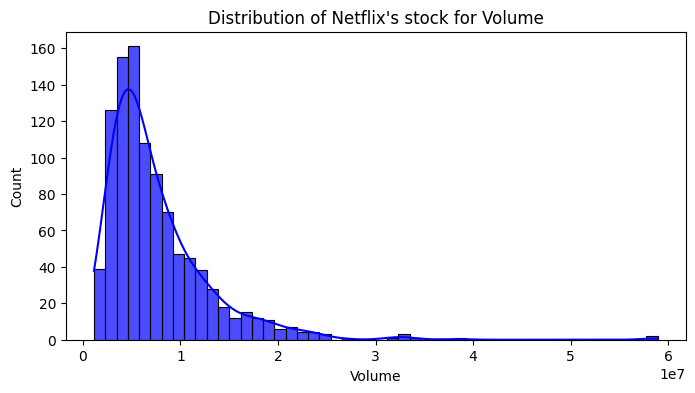

In [9]:
# Visual Exploratory Data Analysis (Step 5)
continuous_vars = ['Open', 'High', 'Low', 'Close', 'Volume']  # Example continuous columns
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[var], color='blue', kde=True, bins=50, alpha=0.7)
    plt.title(f"Distribution of Netflix's stock for {var}")
    plt.show()

    # Tried to use palette=["#0000CC"]) but for some reason it wouldn't work, I also tried to get rgb values for color and that didn't work as well like doing color = ["0000CC"] or color = '0, 0, 204'

C:\Users\samso\AppData\Local\Temp\ipykernel_7448\1047454501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned[var], palette=["#0000CC"])


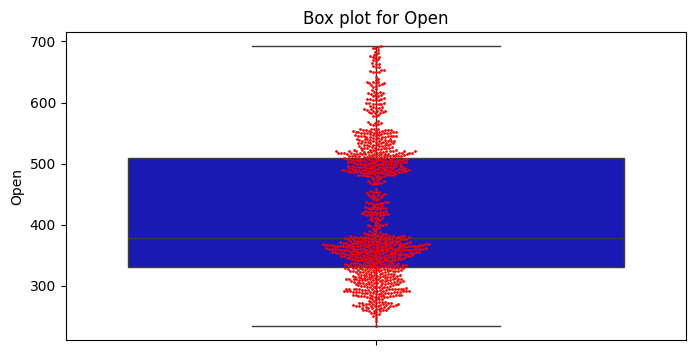

C:\Users\samso\AppData\Local\Temp\ipykernel_7448\1047454501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned[var], palette=["#0000CC"])


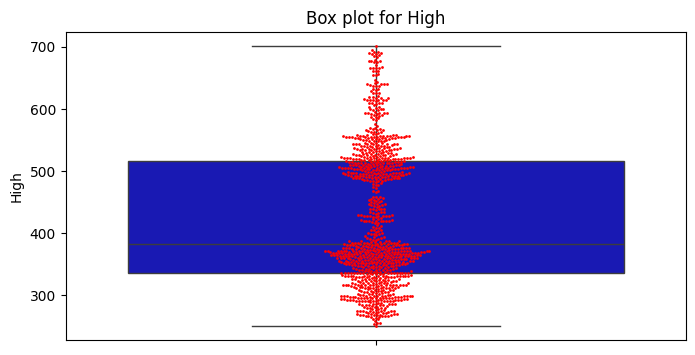

C:\Users\samso\AppData\Local\Temp\ipykernel_7448\1047454501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned[var], palette=["#0000CC"])


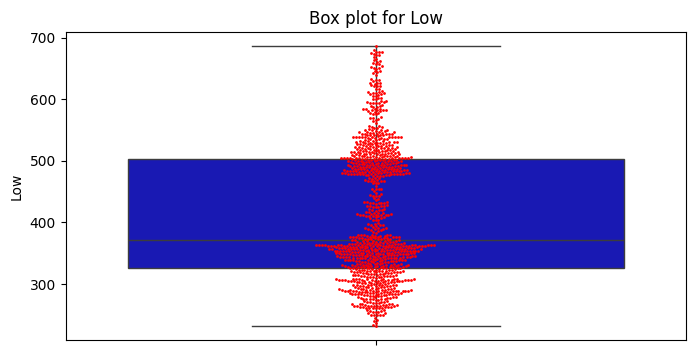

C:\Users\samso\AppData\Local\Temp\ipykernel_7448\1047454501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned[var], palette=["#0000CC"])


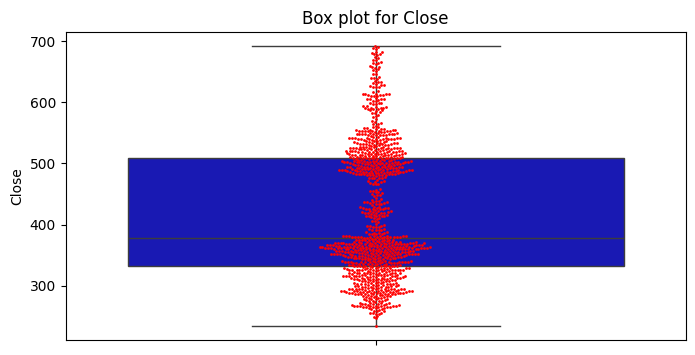

C:\Users\samso\AppData\Local\Temp\ipykernel_7448\1047454501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned[var], palette=["#0000CC"])


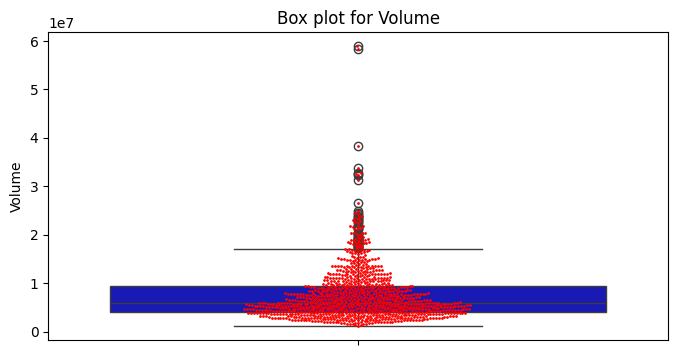

In [10]:
# Outlier Analysis (Step 6) (Visualization of outliers with boxplots) 
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_cleaned[var], palette=["#0000CC"])
    plt.title(f'Box plot for {var}')

    #This is the red circles that scatters
    sns.swarmplot(data=data_cleaned[var], color='red', size=2)
    plt.show()


# Step 7

We can just skip step 7 as theres no missing values that I can see.

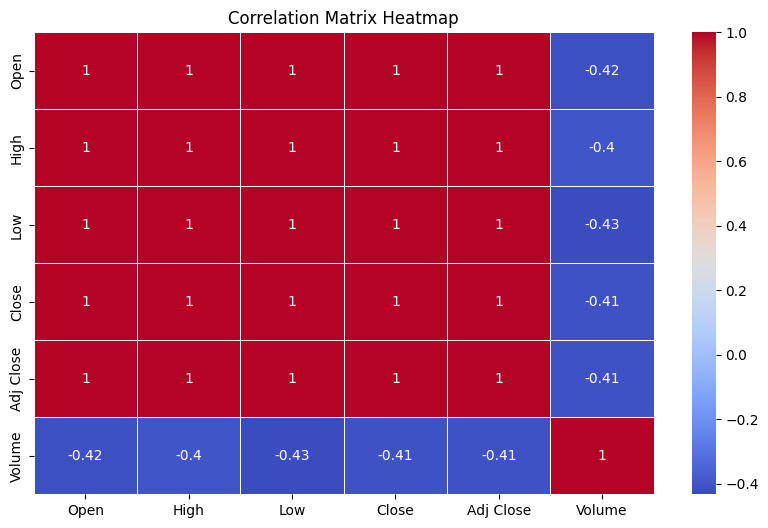

In [11]:
# This will select only numeric columns from data_cleaned (#This is step 8)
numeric_data = data_cleaned.select_dtypes(include=['number'])  # Select only numeric columns

# Calculation of the correlation matrix
corr_matrix = numeric_data.corr()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



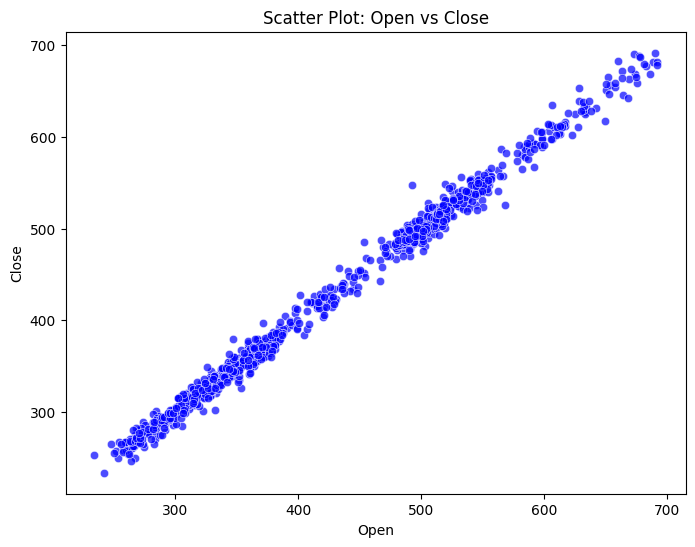

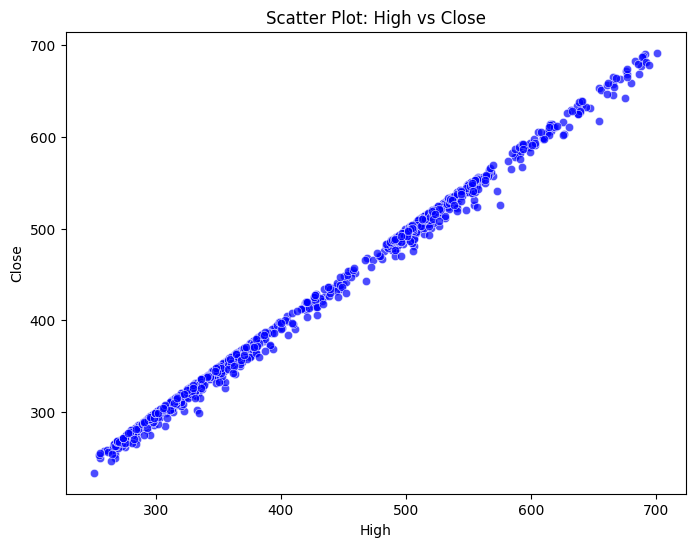

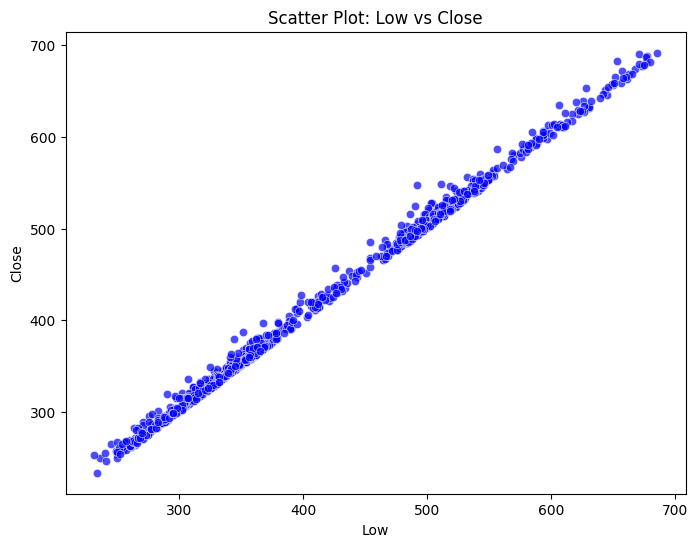

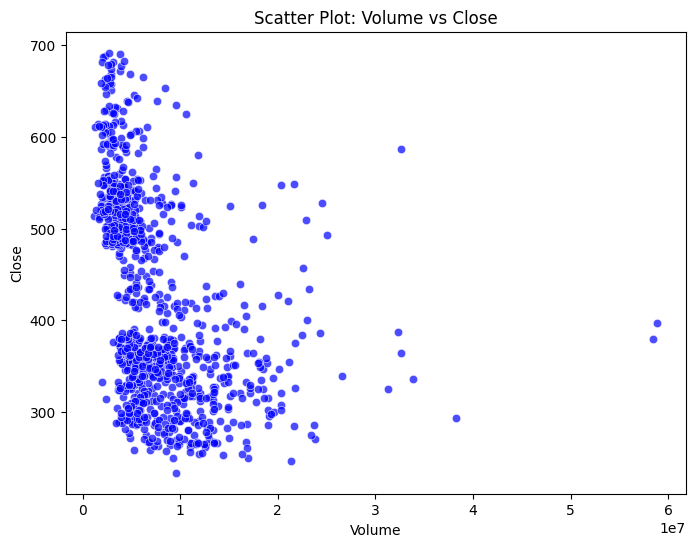

Pearson's Correlation: -0.4133618746720192


In [12]:
# Scatter plot for visual analysis between continuous variables (Target variable is close or aj close and predictor variable can be either open, high, low, volume) # This is step 8

predictors = ['Open', 'High', 'Low', 'Volume']

# Scatter Plot for close vs other things such as open, high, low and volume.

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_cleaned[predictor], y=data_cleaned['Close'], color = 'blue', alpha=0.7)
    plt.title(f'Scatter Plot: {predictor} vs Close')
    plt.xlabel(predictor)
    plt.ylabel('Close')
    plt.show()

# Pearson's correlation value
corr_value = data_cleaned['Volume'].corr(data_cleaned['Close'])
print(f"Pearson's Correlation: {corr_value}")

C:\Users\samso\AppData\Local\Temp\ipykernel_7448\3042459350.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data_cleaned['Date'], y=data_cleaned['Close'], palette=["#0000CC"])


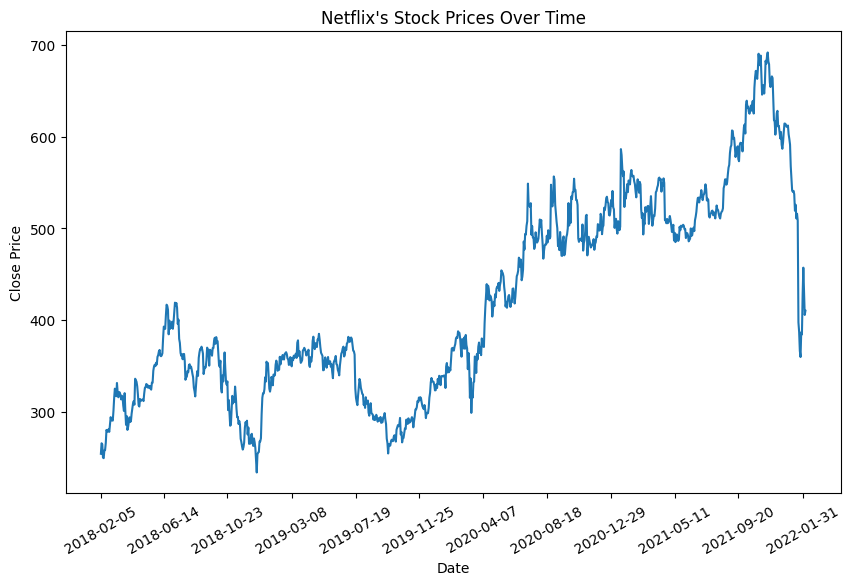

In [20]:
# Line plot of Close prices over time (Step 8)
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_cleaned['Date'], y=data_cleaned['Close'], palette=["#0000CC"])
plt.title("Netflix's Stock Prices Over Time")
plt.xlabel('Date')
plt.ylabel('Close Price')

# Makes it easier to read the dates pretty much
plt.xticks(rotation=30)

# This makes it show 12 time periods.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Adjust interval based on your data density
plt.show()

F-statistic: 578.6373897282109, P-value: 0.0
Reject the null hypothesis: There is a significant relationship between the variables.


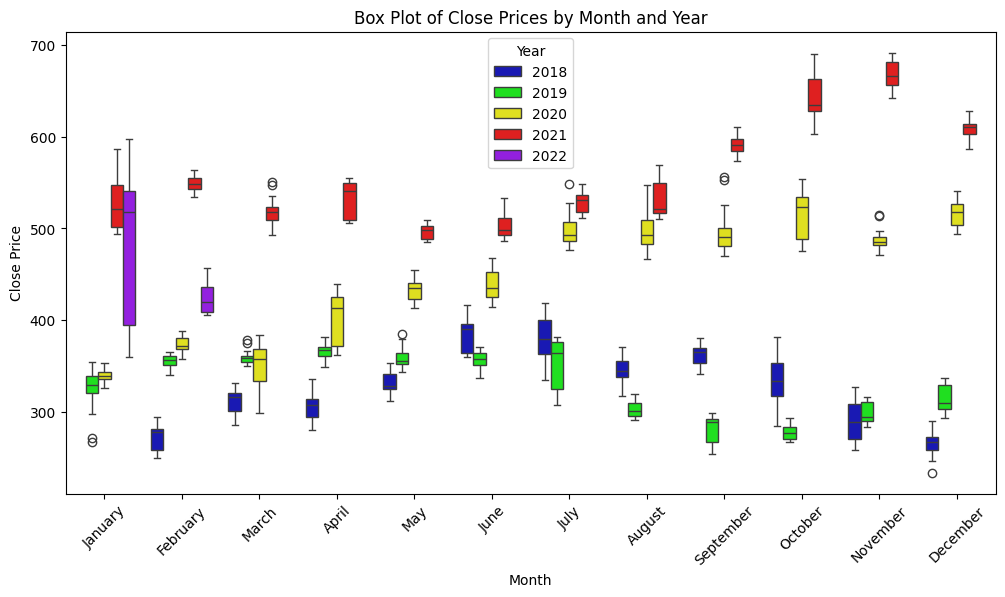

In [90]:
# Ensure the 'Date' column is in datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# This is the columns for the Year and Month
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month_name()

# This Groups the data by Year and Month
groups = data_cleaned.groupby(['Year', 'Month'])['Close'].apply(list)

# ANOVA Test
f_statistic, p_value = stats.f_oneway(*groups)

# This displays the results
print(f"F-statistic: {f_statistic}, P-value: {p_value}")

#This will Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

# Pretty much month order from January to December 
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Colours for each year, 2018 being blue, 2019 being green, 2020 yellow, 2021 red, 2022 purple.
monthpalette = ['#0000CC','#00FF00','#FFFF00','#FF0000', '#9900FF']

# This just makes the box plot 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', hue='Year', data=data_cleaned, order=month_order, palette=monthpalette)
plt.title('Box Plot of Close Prices by Month and Year')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()



In [91]:
# This is just converting Data to numeric values (Step 11)

# This just converts the catagorys to numeric values using get_dummie
data_encoded = pd.get_dummies(data_cleaned, columns=['Month', 'Year'], drop_first=True)

# This prinst the data 
print(data_encoded.head())

# Don't know why January, April, July are not included. Also 2018 isn't included as well.

        Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  Month_August  Month_December  Month_February  ...  Month_June  \
0  11896100         False           False            True  ...       False   
1  12595800         False           False            True  ...       False   
2   8981500         False           False            True  ...       False   
3   9306700         False           False            True  ...       False   
4  16906900         False           False            True  ...       False   

   Month_March  Month_May  Month_November  Month_October  Month_September 

In [65]:
# Splitting data.

# This is just the cleaned data.
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month_name()

# Check the new columns after get_dummies
print(data_encoded.columns)

# 2018 and April isn't included as wel for some reason?

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022'],
      dtype='object')


In [93]:


# Define target variable and selected features
target_variable = 'Close'
selected_features = [
'Open', 'High', 'Low', 'Volume', 
    'Month_January', 'Month_February', 'Month_March', 
    'Month_May', 'Month_June', 'Month_July', 
    'Month_August', 'Month_September', 'Month_October', 
    'Month_November', 'Month_December'
]
# For some reason I don't know why an error was occuring, but then I found out that if you put in 'Month_April then the thing breaks. Probably because when splitting the data *
# * It didn't include april at all which I don't know why so I just removed it.

# Define features and target variable
X = data_encoded[selected_features]
y = data_encoded[target_variable]

# This splits the data into training test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This is the models // algoirthms 
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Training and evaluating each model
results = {}
for model_name, model in models.items():
    # Fitting the Model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculations
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Results
    results[model_name] = {'MSE': mse, 'R^2': r2}

# This just prints the results and displays it
results_df = pd.DataFrame(results).T
print(results_df)


                                      MSE       R^2
Linear Regression               16.255523  0.998606
Decision Tree Regressor         54.598652  0.995317
Random Forest Regressor         25.932272  0.997776
AdaBoost Regressor              49.518752  0.995753
K-Nearest Neighbors Regressor  112.765551  0.990329
